In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.read_csv("results/csv_H2.csv")

,xbj,Q2,z,zi,y_neg_H2,err_neg_H2,y_pos_H2,err_pos_H2,y_neg_D2,err_neg_D2,...,y_D2_neg_delta,y_D2_neg_exc,y_D2_neg_rho,y_D2_neg_Dummy,y_D2_neg_incnorad,y_D2_pos_delta,y_D2_pos_exc,y_D2_pos_rho,y_D2_pos_Dummy,y_D2_pos_incnorad
0,0.35,4.0,0.40,0.025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.921978,0.0,0.0,0.0,0.0,0.709781
1,0.35,4.0,0.40,0.075,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.942190,0.0,0.0,0.0,0.0,0.765372
2,0.35,4.0,0.40,0.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.962582,0.0,0.0,0.0,0.0,0.817882
3,0.35,4.0,0.40,0.175,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.983152,0.0,0.0,0.0,0.0,0.867313
4,0.35,4.0,0.40,0.225,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.003900,0.0,0.0,0.0,0.0,0.913665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.60,5.5,0.65,0.775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.129410,0.0,-0.0,0.0,0.0,1.112210
376,0.60,5.5,0.65,0.825,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.089700,0.0,-0.0,0.0,-0.0,1.087090
377,0.60,5.5,0.65,0.875,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.041780,0.0,-0.0,-0.0,-0.0,1.057210
378,0.60,5.5,0.65,0.925,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.985646,0.0,-0.0,-0.0,-0.0,1.022570


In [2]:
df = pd.read_csv("results/csv_H2.csv")
df[df['y_neg_H2']>0].head()

,xbj,Q2,z,zi,y_neg_H2,err_neg_H2,y_pos_H2,err_pos_H2,y_neg_D2,err_neg_D2,...,y_D2_neg_delta,y_D2_neg_exc,y_D2_neg_rho,y_D2_neg_Dummy,y_D2_neg_incnorad,y_D2_pos_delta,y_D2_pos_exc,y_D2_pos_rho,y_D2_pos_Dummy,y_D2_pos_incnorad
6,0.35,4.0,0.4,0.325,1.69093,0.102026,2.846390,0.115588,3.843630,0.223814,...,0.012343,0.019065,0.147573,0.506994,1.04594,0.031196,0.039783,0.114877,0.599957,0.997129
7,0.35,4.0,0.4,0.375,34.96390,0.463936,63.324700,0.545195,68.614100,0.945632,...,0.254088,0.356854,2.371580,9.177930,1.06722,0.753441,0.846478,2.272010,12.910500,1.034240
8,0.35,4.0,0.4,0.425,36.96920,0.477054,69.870100,0.572678,74.597900,0.986005,...,0.354505,0.462442,2.729360,10.148900,1.08869,1.043060,1.069000,2.703590,14.651300,1.068270
9,0.35,4.0,0.4,0.475,15.04340,0.304313,30.991700,0.381407,32.371300,0.649525,...,0.205834,0.257513,1.439380,4.491930,1.11033,0.576848,0.564852,1.386920,6.414190,1.099230
10,0.35,4.0,0.4,0.525,0.26361,0.040284,0.423848,0.044604,0.446527,0.076285,...,0.003805,0.004674,0.025986,0.063365,1.13216,0.009218,0.008918,0.021798,0.081076,1.127100


In [3]:
df[df['xbj'] == 0.35][df['Q2']==4][df['y_neg_H2']>0]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/152783922.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['xbj'] == 0.35][df['Q2']==4][df['y_neg_H2']>0]


,xbj,Q2,z,zi,y_neg_H2,err_neg_H2,y_pos_H2,err_pos_H2,y_neg_D2,err_neg_D2,...,y_D2_neg_delta,y_D2_neg_exc,y_D2_neg_rho,y_D2_neg_Dummy,y_D2_neg_incnorad,y_D2_pos_delta,y_D2_pos_exc,y_D2_pos_rho,y_D2_pos_Dummy,y_D2_pos_incnorad
6,0.35,4.0,0.4,0.325,1.690930,0.102026,2.846390,0.115588,3.843630,0.223814,...,0.012343,0.019065,0.147573,0.506994,1.04594,0.031196,0.039783,0.114877,0.599957,0.997129
7,0.35,4.0,0.4,0.375,34.963900,0.463936,63.324700,0.545195,68.614100,0.945632,...,0.254088,0.356854,2.371580,9.177930,1.06722,0.753441,0.846478,2.272010,12.910500,1.034240
8,0.35,4.0,0.4,0.425,36.969200,0.477054,69.870100,0.572678,74.597900,0.986005,...,0.354505,0.462442,2.729360,10.148900,1.08869,1.043060,1.069000,2.703590,14.651300,1.068270
9,0.35,4.0,0.4,0.475,15.043400,0.304313,30.991700,0.381407,32.371300,0.649525,...,0.205834,0.257513,1.439380,4.491930,1.11033,0.576848,0.564852,1.386920,6.414190,1.099230
10,0.35,4.0,0.4,0.525,0.263610,0.040284,0.423848,0.044604,0.446527,0.076285,...,0.003805,0.004674,0.025986,0.063365,1.13216,0.009218,0.008918,0.021798,0.081076,1.127100
28,0.35,4.0,0.5,0.425,5.842800,0.161620,11.445800,0.235618,13.038100,0.376258,...,0.061960,0.080825,0.477032,1.773800,1.08869,0.167199,0.171357,0.433377,2.348560,1.068270
29,0.35,4.0,0.5,0.475,29.713000,0.364467,61.148900,0.544604,63.971000,0.833432,...,0.406760,0.508888,2.844450,8.876780,1.11033,1.131260,1.107740,2.719900,12.578900,1.099230
30,0.35,4.0,0.5,0.525,27.201400,0.348724,57.348300,0.527407,61.992100,0.820440,...,0.528300,0.648962,3.607670,8.797100,1.13216,1.413900,1.367810,3.343410,12.435800,1.127100
31,0.35,4.0,0.5,0.575,17.050400,0.276092,37.504300,0.426507,36.183800,0.626810,...,0.406807,0.497149,2.814380,5.264020,1.15416,1.187120,1.154930,2.847840,8.396320,1.151900
32,0.35,4.0,0.5,0.625,2.481650,0.105331,5.704560,0.166340,5.117030,0.235715,...,0.074303,0.090921,0.528171,0.764908,1.17634,0.214777,0.211743,0.529232,1.249970,1.173610


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
/var/folders/ll/8_2_l77j4yl2

20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     5.439914
29    32.694718
30    32.177711
31    22.404415
32     3.623370
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/562692013.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-0.245*df[df['xbj'] 

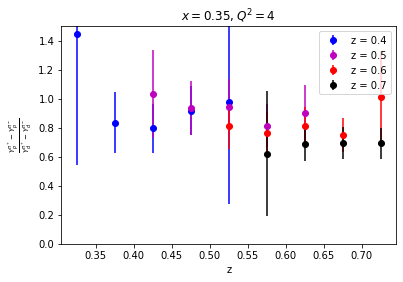

In [4]:
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']

y_neg_H2_1 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2_1 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2_1 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2_1 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff_1 = y_pos_H2_1-y_neg_H2_1
y_D2_diff_1 = y_pos_D2_1-y_neg_D2_1
diff_ratio_1 = y_H2_diff_1/y_D2_diff_1
error_neg_H2_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2_1 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2_1 = np.sqrt(error_neg_H2_1**2+0.262**2*error_neg_Dummy_1**2)
err_pos_H2_1 = np.sqrt(error_pos_H2_1**2+0.262**2*error_pos_Dummy_1**2)
err_neg_D2_1 = np.sqrt(error_neg_D2_1**2+0.245**2*error_neg_Dummy_1**2)
err_pos_D2_1 = np.sqrt(error_pos_D2_1**2+0.245**2*error_pos_Dummy_1**2)

err_diff_H2_1 = np.sqrt(err_neg_H2_1**2+err_pos_H2_1**2)
err_diff_D2_1 = np.sqrt(err_neg_D2_1**2+err_pos_D2_1**2)

err_diff_1 = diff_ratio_1*np.sqrt(err_diff_H2_1**2/y_H2_diff_1**2+err_diff_D2_1**2/y_D2_diff_1**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis_1,diff_ratio_1,err_diff_1,color = 'b',fmt = 'o',label = 'z = 0.4')

y_neg_H2_2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2_2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2_2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2_2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
#print(z_axis_2)
y_H2_diff_2 = y_pos_H2_2-y_neg_H2_2
y_D2_diff_2 = y_pos_D2_2-y_neg_D2_2
diff_ratio_2 = y_H2_diff_2/y_D2_diff_2
print(y_H2_diff_2)
error_neg_H2_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2_2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2_2 = np.sqrt(error_neg_H2_2**2+0.262**2*error_neg_Dummy_2**2)
err_pos_H2_2 = np.sqrt(error_pos_H2_2**2+0.262**2*error_pos_Dummy_2**2)
err_neg_D2_2 = np.sqrt(error_neg_D2_2**2+0.245**2*error_neg_Dummy_2**2)
err_pos_D2_2 = np.sqrt(error_pos_D2_2**2+0.245**2*error_pos_Dummy_2**2)

err_diff_H2_2 = np.sqrt(err_neg_H2_2**2+err_pos_H2_2**2)
err_diff_D2_2 = np.sqrt(err_neg_D2_2**2+err_pos_D2_2**2)

err_diff_2 = diff_ratio_2*np.sqrt(err_diff_H2_2**2/y_H2_diff_2**2+err_diff_D2_2**2/y_D2_diff_2**2)


#plt.plot(z_axis_2,diff_ratio_2,'mo',label = 'z = 0.5')
plt.errorbar(z_axis_2,diff_ratio_2,err_diff_2,color = 'm',fmt = 'o',label = 'z = 0.5')

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ro',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ko',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.35,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x35Q4_data.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-0.245*df[df['

100     0.000000
101     0.000000
102     0.000000
103     0.000000
104     0.000000
105     0.000000
106     0.000000
107     0.000000
108    14.307722
109    37.202327
110    26.793970
111     4.664698
112     0.000000
113     0.000000
114     0.000000
115     0.000000
116     0.000000
117     0.000000
118     0.000000
119     0.000000
dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_H2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_Dummy_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1491259321.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']
/var/folders/ll/8_2_l77j4yl2zjb6

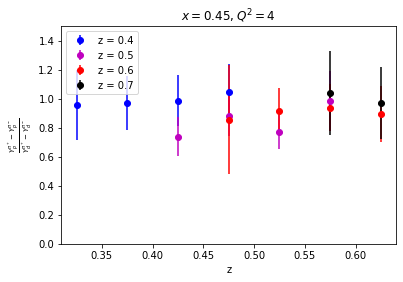

In [5]:
y_neg_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff_1 = y_pos_H2_1-y_neg_H2_1
y_D2_diff_1 = y_pos_D2_1-y_neg_D2_1
diff_ratio_1 = y_H2_diff_1/y_D2_diff_1
error_neg_H2_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2_1 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2_1 = np.sqrt(error_neg_H2_1**2+0.262**2*error_neg_Dummy_1**2)
err_pos_H2_1 = np.sqrt(error_pos_H2_1**2+0.262**2*error_pos_Dummy_1**2)
err_neg_D2_1 = np.sqrt(error_neg_D2_1**2+0.245**2*error_neg_Dummy_1**2)
err_pos_D2_1 = np.sqrt(error_pos_D2_1**2+0.245**2*error_pos_Dummy_1**2)

err_diff_H2_1 = np.sqrt(err_neg_H2_1**2+err_pos_H2_1**2)
err_diff_D2_1 = np.sqrt(err_neg_D2_1**2+err_pos_D2_1**2)

err_diff_1 = diff_ratio_1*np.sqrt(err_diff_H2_1**2/y_H2_diff_1**2+err_diff_D2_1**2/y_D2_diff_1**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis_1,diff_ratio_1,err_diff_1,color = 'b',fmt = 'o',label = 'z = 0.4')

y_neg_H2_2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2_2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2_2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2_2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
#print(z_axis_2)
y_H2_diff_2 = y_pos_H2_2-y_neg_H2_2
y_D2_diff_2 = y_pos_D2_2-y_neg_D2_2
diff_ratio_2 = y_H2_diff_2/y_D2_diff_2
print(y_H2_diff_2)
error_neg_H2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2_2 = np.sqrt(error_neg_H2_2**2+0.262**2*error_neg_Dummy_2**2)
err_pos_H2_2 = np.sqrt(error_pos_H2_2**2+0.262**2*error_pos_Dummy_2**2)
err_neg_D2_2 = np.sqrt(error_neg_D2_2**2+0.245**2*error_neg_Dummy_2**2)
err_pos_D2_2 = np.sqrt(error_pos_D2_2**2+0.245**2*error_pos_Dummy_2**2)

err_diff_H2_2 = np.sqrt(err_neg_H2_2**2+err_pos_H2_2**2)
err_diff_D2_2 = np.sqrt(err_neg_D2_2**2+err_pos_D2_2**2)

err_diff_2 = diff_ratio_2*np.sqrt(err_diff_H2_2**2/y_H2_diff_2**2+err_diff_D2_2**2/y_D2_diff_2**2)


#plt.plot(z_axis_2,diff_ratio_2,'mo',label = 'z = 0.5')
plt.errorbar(z_axis_2,diff_ratio_2,err_diff_2,color = 'm',fmt = 'o',label = 'z = 0.5')

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ro',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ko',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x45Q4_data.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_n

180     0.000000
181     0.000000
182     0.000000
183     0.000000
184     0.000000
185     0.000000
186     0.000000
187     0.000000
188     5.413466
189    21.036585
190    19.504779
191     9.912285
192     0.205676
193     0.000000
194     0.000000
195     0.000000
196     0.000000
197     0.000000
198     0.000000
199     0.000000
dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2835034879.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_

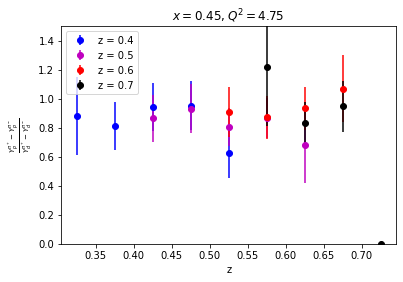

In [6]:
y_neg_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2_1 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff_1 = y_pos_H2_1-y_neg_H2_1
y_D2_diff_1 = y_pos_D2_1-y_neg_D2_1
diff_ratio_1 = y_H2_diff_1/y_D2_diff_1
error_neg_H2_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2_1 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2_1 = np.sqrt(error_neg_H2_1**2+0.262**2*error_neg_Dummy_1**2)
err_pos_H2_1 = np.sqrt(error_pos_H2_1**2+0.262**2*error_pos_Dummy_1**2)
err_neg_D2_1 = np.sqrt(error_neg_D2_1**2+0.245**2*error_neg_Dummy_1**2)
err_pos_D2_1 = np.sqrt(error_pos_D2_1**2+0.245**2*error_pos_Dummy_1**2)

err_diff_H2_1 = np.sqrt(err_neg_H2_1**2+err_pos_H2_1**2)
err_diff_D2_1 = np.sqrt(err_neg_D2_1**2+err_pos_D2_1**2)

err_diff_1 = diff_ratio_1*np.sqrt(err_diff_H2_1**2/y_H2_diff_1**2+err_diff_D2_1**2/y_D2_diff_1**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis_1,diff_ratio_1,err_diff_1,color = 'b',fmt = 'o',label = 'z = 0.4')

y_neg_H2_2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2_2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2_2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2_2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
#print(z_axis_2)
y_H2_diff_2 = y_pos_H2_2-y_neg_H2_2
y_D2_diff_2 = y_pos_D2_2-y_neg_D2_2
diff_ratio_2 = y_H2_diff_2/y_D2_diff_2
print(y_H2_diff_2)
error_neg_H2_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2_2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2_2 = np.sqrt(error_neg_H2_2**2+0.262**2*error_neg_Dummy_2**2)
err_pos_H2_2 = np.sqrt(error_pos_H2_2**2+0.262**2*error_pos_Dummy_2**2)
err_neg_D2_2 = np.sqrt(error_neg_D2_2**2+0.245**2*error_neg_Dummy_2**2)
err_pos_D2_2 = np.sqrt(error_pos_D2_2**2+0.245**2*error_pos_Dummy_2**2)

err_diff_H2_2 = np.sqrt(err_neg_H2_2**2+err_pos_H2_2**2)
err_diff_D2_2 = np.sqrt(err_neg_D2_2**2+err_pos_D2_2**2)

err_diff_2 = diff_ratio_2*np.sqrt(err_diff_H2_2**2/y_H2_diff_2**2+err_diff_D2_2**2/y_D2_diff_2**2)


#plt.plot(z_axis_2,diff_ratio_2,'mo',label = 'z = 0.5')
plt.errorbar(z_axis_2,diff_ratio_2,err_diff_2,color = 'm',fmt = 'o',label = 'z = 0.5')

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ro',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ko',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x45Q475_data.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_

260     0.000000
261     0.000000
262     0.000000
263     0.000000
264     0.000000
265     0.000000
266     0.000000
267     0.000000
268     6.592552
269    11.484820
270     5.083905
271     0.176959
272     0.000000
273     0.000000
274     0.000000
275     0.000000
276     0.000000
277     0.000000
278     0.000000
279     0.000000
dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/438952991.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2'

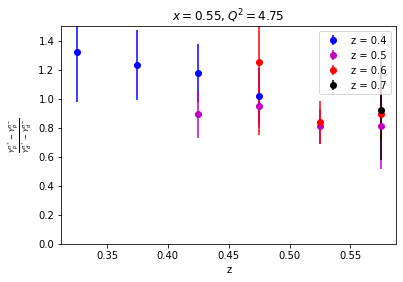

In [7]:
y_neg_H2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2_1 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff_1 = y_pos_H2_1-y_neg_H2_1
y_D2_diff_1 = y_pos_D2_1-y_neg_D2_1
diff_ratio_1 = y_H2_diff_1/y_D2_diff_1
error_neg_H2_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2_1 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2_1 = np.sqrt(error_neg_H2_1**2+0.262**2*error_neg_Dummy_1**2)
err_pos_H2_1 = np.sqrt(error_pos_H2_1**2+0.262**2*error_pos_Dummy_1**2)
err_neg_D2_1 = np.sqrt(error_neg_D2_1**2+0.245**2*error_neg_Dummy_1**2)
err_pos_D2_1 = np.sqrt(error_pos_D2_1**2+0.245**2*error_pos_Dummy_1**2)

err_diff_H2_1 = np.sqrt(err_neg_H2_1**2+err_pos_H2_1**2)
err_diff_D2_1 = np.sqrt(err_neg_D2_1**2+err_pos_D2_1**2)

err_diff_1 = diff_ratio_1*np.sqrt(err_diff_H2_1**2/y_H2_diff_1**2+err_diff_D2_1**2/y_D2_diff_1**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis_1,diff_ratio_1,err_diff_1,color = 'b',fmt = 'o',label = 'z = 0.4')

y_neg_H2_2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2_2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2_2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2_2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
#print(z_axis_2)
y_H2_diff_2 = y_pos_H2_2-y_neg_H2_2
y_D2_diff_2 = y_pos_D2_2-y_neg_D2_2
diff_ratio_2 = y_H2_diff_2/y_D2_diff_2
print(y_H2_diff_2)
error_neg_H2_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2_2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2_2 = np.sqrt(error_neg_H2_2**2+0.262**2*error_neg_Dummy_2**2)
err_pos_H2_2 = np.sqrt(error_pos_H2_2**2+0.262**2*error_pos_Dummy_2**2)
err_neg_D2_2 = np.sqrt(error_neg_D2_2**2+0.245**2*error_neg_Dummy_2**2)
err_pos_D2_2 = np.sqrt(error_pos_D2_2**2+0.245**2*error_pos_Dummy_2**2)

err_diff_H2_2 = np.sqrt(err_neg_H2_2**2+err_pos_H2_2**2)
err_diff_D2_2 = np.sqrt(err_neg_D2_2**2+err_pos_D2_2**2)

err_diff_2 = diff_ratio_2*np.sqrt(err_diff_H2_2**2/y_H2_diff_2**2+err_diff_D2_2**2/y_D2_diff_2**2)


#plt.plot(z_axis_2,diff_ratio_2,'mo',label = 'z = 0.5')
plt.errorbar(z_axis_2,diff_ratio_2,err_diff_2,color = 'm',fmt = 'o',label = 'z = 0.5')

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ro',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy'])*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ko',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.55,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x55Q475_data.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']

340    0.000000
341    0.000000
342    0.000000
343    0.000000
344    0.000000
345    0.000000
346    0.000000
347    0.000000
348    0.000000
349    2.883753
350    1.948983
351         NaN
352    0.000000
353    0.000000
354    0.000000
355    0.000000
356    0.000000
357    0.000000
358    0.000000
359    0.000000
dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2302548327.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame

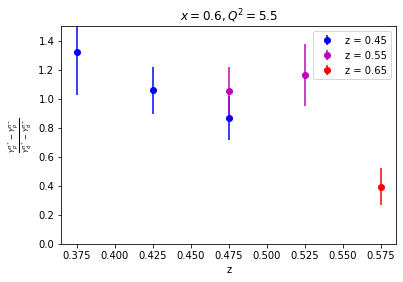

In [8]:
y_neg_H2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
y_neg_D2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2_1 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2_diff_1 = y_pos_H2_1-y_neg_H2_1
y_D2_diff_1 = y_pos_D2_1-y_neg_D2_1
diff_ratio_1 = y_H2_diff_1/y_D2_diff_1
error_neg_H2_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']
error_pos_H2_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']
error_neg_D2_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2_1 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2_1 = np.sqrt(error_neg_H2_1**2+0.262**2*error_neg_Dummy_1**2)
err_pos_H2_1 = np.sqrt(error_pos_H2_1**2+0.262**2*error_pos_Dummy_1**2)
err_neg_D2_1 = np.sqrt(error_neg_D2_1**2+0.245**2*error_neg_Dummy_1**2)
err_pos_D2_1 = np.sqrt(error_pos_D2_1**2+0.245**2*error_pos_Dummy_1**2)

err_diff_H2_1 = np.sqrt(err_neg_H2_1**2+err_pos_H2_1**2)
err_diff_D2_1 = np.sqrt(err_neg_D2_1**2+err_pos_D2_1**2)

err_diff_1 = diff_ratio_1*np.sqrt(err_diff_H2_1**2/y_H2_diff_1**2+err_diff_D2_1**2/y_D2_diff_1**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis_1,diff_ratio_1,err_diff_1,color = 'b',fmt = 'o',label = 'z = 0.45')

y_neg_H2_2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2_2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
y_neg_D2_2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2_2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
#print(z_axis_2)
y_H2_diff_2 = y_pos_H2_2-y_neg_H2_2
y_D2_diff_2 = y_pos_D2_2-y_neg_D2_2
diff_ratio_2 = y_H2_diff_2/y_D2_diff_2
print(y_H2_diff_2)
error_neg_H2_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']
error_pos_H2_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']
error_neg_D2_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2_2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_H2_2 = np.sqrt(error_neg_H2_2**2+0.262**2*error_neg_Dummy_2**2)
err_pos_H2_2 = np.sqrt(error_pos_H2_2**2+0.262**2*error_pos_Dummy_2**2)
err_neg_D2_2 = np.sqrt(error_neg_D2_2**2+0.245**2*error_neg_Dummy_2**2)
err_pos_D2_2 = np.sqrt(error_pos_D2_2**2+0.245**2*error_pos_Dummy_2**2)

err_diff_H2_2 = np.sqrt(err_neg_H2_2**2+err_pos_H2_2**2)
err_diff_D2_2 = np.sqrt(err_neg_D2_2**2+err_pos_D2_2**2)

err_diff_2 = diff_ratio_2*np.sqrt(err_diff_H2_2**2/y_H2_diff_2**2+err_diff_D2_2**2/y_D2_diff_2**2)


#plt.plot(z_axis_2,diff_ratio_2,'mo',label = 'z = 0.5')
plt.errorbar(z_axis_2,diff_ratio_2,err_diff_2,color = 'm',fmt = 'o',label = 'z = 0.55')

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy'])*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis,diff_ratio,'ro',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.65')


plt.title(r'$x = 0.6,Q^2 = 5.5$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x6Q55_data.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df

<class 'pandas.core.series.Series'>


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1468623185.py:119: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_p

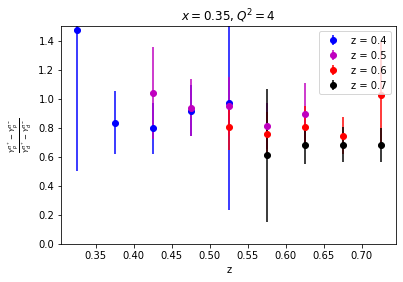

In [9]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')


plt.title(r'$x = 0.35,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x35Q4_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:117: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/256195745.py:119: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/

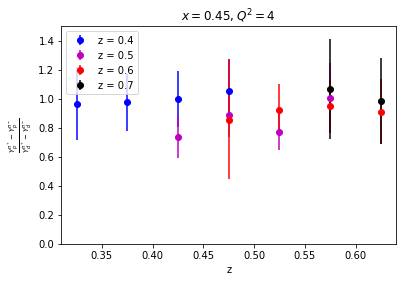

In [10]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x45Q4_data.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:112: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:113: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/2374758436.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']

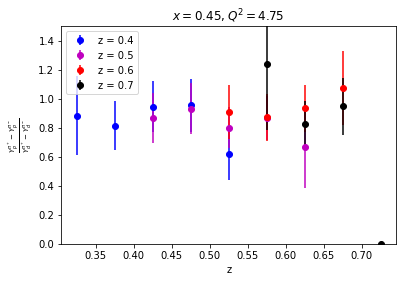

In [11]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()

plt.savefig("results/H2runs/diff_x45Q475_datadeltaexc.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:92: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:93: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:112: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/78618902.py:113: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][d

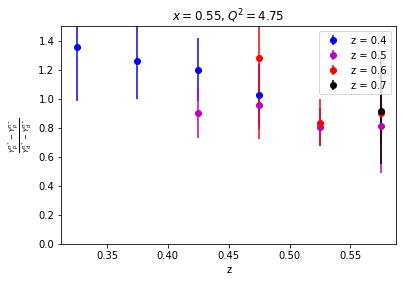

In [12]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.55,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x55Q475_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3325898867.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3325898867.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3325898867.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_

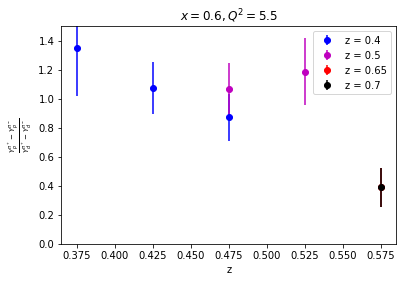

In [13]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',fmt = 'o',label = 'z = 0.65')


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.6,Q^2 = 5.5$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_x6Q55_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:115: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:117: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1266140494.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_p

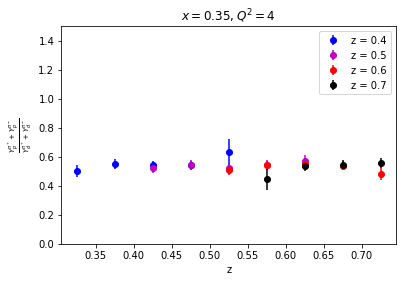

In [14]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.35,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/sum_x35Q4_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:115: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/442192632.py:117: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)

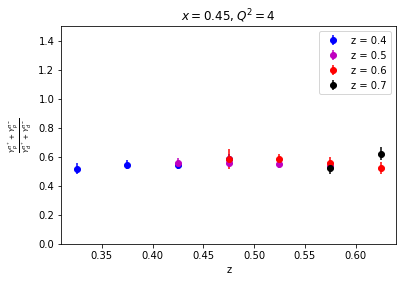

In [15]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()

plt.savefig("results/H2runs/sum_x45Q4_datadeltaexc.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:117: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/974918169.py:119: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb

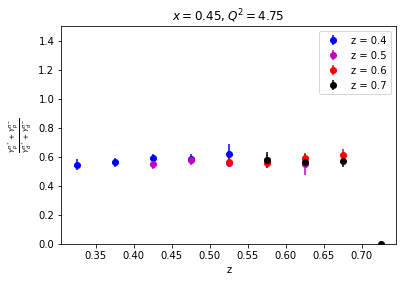

In [16]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()

plt.savefig("results/H2runs/sum_x45Q475_datadeltaexc.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:119: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/1345744278.py:120: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2

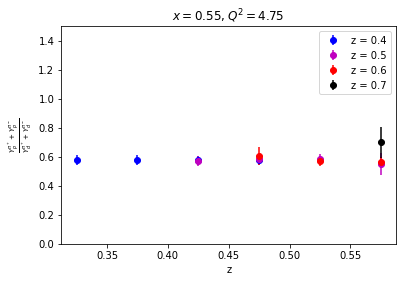

In [17]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.55,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()

plt.savefig("results/H2runs/sum_x55Q475_datadeltaexc.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3888238691.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3888238691.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3888238691.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_

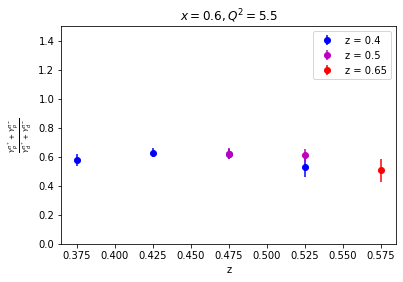

In [18]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',fmt = 'o',label = 'z = 0.5')




y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',fmt = 'o',label = 'z = 0.65')



plt.title(r'$x = 0.6,Q^2 = 5.5$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/sum_x6Q55_datadeltaexc.pdf")


In [19]:
sum_1 = [[]]#0.35,4
sum_2 = [[]]#0.45,4
sum_3 = [[]]#0.45,4.75
sum_4 = [[]]#0.55,4.75
sum_5 = [[]]#0.6,5.5
sum_err_1 = [[]]#0.35,4
sum_err_2 = [[]]#0.45,4
sum_err_3 = [[]]#0.45,4.75
sum_err_4 = [[]]#0.55,4.75
sum_err_5 = [[]]#0.6,5.5

In [20]:
diff_1 = [[]]#0.35,4
diff_2 = [[]]#0.45,4
diff_3 = [[]]#0.45,4.75
diff_4 = [[]]#0.55,4.75
diff_5 = [[]]#0.6,5.5
diff_err_1 = [[]]#0.35,4
diff_err_2 = [[]]#0.45,4
diff_err_3 = [[]]#0.45,4.75
diff_err_4 = [[]]#0.55,4.75
diff_err_5 = [[]]#0.6,5.5
import math
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    average = -1
    for i in range(len(value)):
        if not math.isnan(value[i]):
            sum_mean += value[i]/(error[i]*error[i])
            sum_sigma += 1/(error[i]*error[i])
    #print(sum_sigma)
    if sum_sigma>0:
        average = sum_mean/sum_sigma
    return average
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    sigma = 0
    for i in range(len(value)):
        if not math.isnan(value[i]):
            sum_sigma += 1/(error[i]*error[i])
    if sum_sigma>0:
        sigma = math.sqrt(1/sum_sigma)
    return sigma


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:120: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:121: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:234: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:235: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:236: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:346: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:347: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:348: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:457: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:458: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:460: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:543: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:544: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:545: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
/var/folders/ll/8_2_l77j

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:645: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:646: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/855216772.py:648: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2'

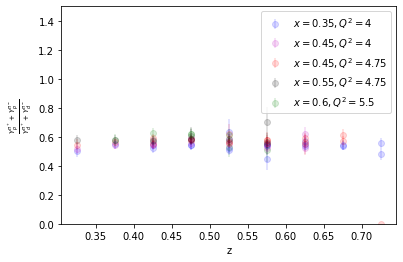

In [21]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',alpha = 0.15,fmt = 'o',label = r'$x = 0.35,Q^2 = 4$')

sum_1.append(sum_ratio.array)
sum_err_1.append(err_sum.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',alpha = 0.15,fmt = 'o')

sum_1.append(sum_ratio.array)
sum_err_1.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',alpha = 0.15,fmt = 'o')

sum_1.append(sum_ratio.array)
sum_err_1.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'b',alpha = 0.15,fmt = 'o')

sum_1.append(sum_ratio.array)
sum_err_1.append(err_sum.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',alpha = 0.15,fmt = 'o',label = r'$x = 0.45,Q^2 = 4$')

sum_2.append(sum_ratio.array)
sum_err_2.append(err_sum.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',alpha = 0.15,fmt = 'o')

sum_2.append(sum_ratio.array)
sum_err_2.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',alpha = 0.15,fmt = 'o')

sum_2.append(sum_ratio.array)
sum_err_2.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'm',alpha = 0.15,fmt = 'o')
sum_2.append(sum_ratio.array)
sum_err_2.append(err_sum.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',alpha = 0.15,fmt = 'o',label = r'$x = 0.45,Q^2 = 4.75$')

sum_3.append(sum_ratio.array)
sum_err_3.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',alpha = 0.15,fmt = 'o' )

sum_3.append(sum_ratio.array)
sum_err_3.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',alpha = 0.15,fmt = 'o')

sum_3.append(sum_ratio.array)
sum_err_3.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'r',alpha = 0.15,fmt = 'o')

sum_3.append(sum_ratio.array)
sum_err_3.append(err_sum.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',alpha = 0.15,fmt = 'o',label = r'$x = 0.55,Q^2 = 4.75$')

sum_4.append(sum_ratio.array)
sum_err_4.append(err_sum.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',alpha = 0.15,fmt = 'o')

sum_4.append(sum_ratio.array)
sum_err_4.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',alpha = 0.15,fmt = 'o')

sum_4.append(sum_ratio.array)
sum_err_4.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'k',alpha = 0.15,fmt = 'o')

sum_4.append(sum_ratio.array)
sum_err_4.append(err_sum.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'g',alpha = 0.15,fmt = 'o',label = r'$x = 0.6,Q^2 = 5.5$')

sum_5.append(sum_ratio.array)
sum_err_5.append(err_sum.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'g',alpha = 0.15,fmt = 'o')

sum_5.append(sum_ratio.array)
sum_err_5.append(err_sum.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2_sum = y_pos_H2+y_neg_H2
y_D2_sum = y_pos_D2+y_neg_D2
sum_ratio = y_H2_sum/y_D2_sum
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_sum_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_sum = sum_ratio*np.sqrt(err_sum_H2**2/y_H2_sum**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,sum_ratio,err_sum,color = 'g',alpha = 0.15,fmt = 'o')

sum_5.append(sum_ratio.array)
sum_err_5.append(err_sum.array)


plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/sum_ratio_notmerged.pdf")


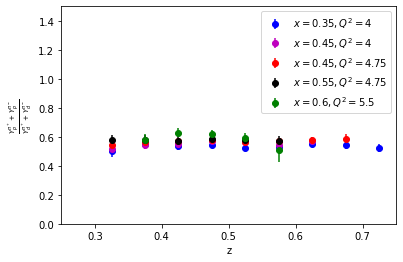

In [22]:
sum_1_average = []
sum_err_1_average = []
for i_i in range(len(sum_1[1])):
    sum_1_each = []
    sum_1_err_each = []
    for i_z in range(1,len(sum_1)):
        sum_1_each.append(sum_1[i_z][i_i])
        sum_1_err_each.append(sum_err_1[i_z][i_i])
    sum_i = Get_weighted_average(sum_1_each,sum_1_err_each)
    sum_err_i = Get_weighted_sigma(sum_1_each,sum_1_err_each) 
    sum_1_average.append(sum_i)
    sum_err_1_average.append(sum_err_i)

plt.errorbar(z_axis.array,sum_1_average,sum_err_1_average,color = 'b',fmt= 'o',label = r'$x = 0.35,Q^2 = 4$')
plt.legend()
plt.ylim(0.1,1.5)

sum_2_average = []
sum_err_2_average = []
for i_i in range(len(sum_2[1])):
    sum_2_each = []
    sum_2_err_each = []
    for i_z in range(1,len(sum_2)):
        sum_2_each.append(sum_2[i_z][i_i])
        sum_2_err_each.append(sum_err_2[i_z][i_i])
    sum_i = Get_weighted_average(sum_2_each,sum_2_err_each)
    sum_err_i = Get_weighted_sigma(sum_2_each,sum_2_err_each) 
    sum_2_average.append(sum_i)
    sum_err_2_average.append(sum_err_i)

plt.errorbar(z_axis.array,sum_2_average,sum_err_2_average,color = 'm',fmt= 'o',label = r'$x = 0.45,Q^2 = 4$')
plt.legend()
plt.ylim(0.1,1.5)

sum_3_average = []
sum_err_3_average = []
for i_i in range(len(sum_3[1])):
    sum_3_each = []
    sum_3_err_each = []
    for i_z in range(1,len(sum_3)):
        sum_3_each.append(sum_3[i_z][i_i])
        sum_3_err_each.append(sum_err_3[i_z][i_i])
    sum_i = Get_weighted_average(sum_3_each,sum_3_err_each)
    sum_err_i = Get_weighted_sigma(sum_3_each,sum_3_err_each) 
    sum_3_average.append(sum_i)
    sum_err_3_average.append(sum_err_i)

plt.errorbar(z_axis.array,sum_3_average,sum_err_3_average,color = 'r',fmt= 'o',label = r'$x = 0.45,Q^2 = 4.75$')
plt.legend()
plt.ylim(0.1,1.5)

sum_4_average = []
sum_err_4_average = []
for i_i in range(len(sum_4[1])):
    sum_4_each = []
    sum_4_err_each = []
    for i_z in range(1,len(sum_4)):
        sum_4_each.append(sum_4[i_z][i_i])
        sum_4_err_each.append(sum_err_4[i_z][i_i])
    sum_i = Get_weighted_average(sum_4_each,sum_4_err_each)
    sum_err_i = Get_weighted_sigma(sum_4_each,sum_4_err_each) 
    sum_4_average.append(sum_i)
    sum_err_4_average.append(sum_err_i)

plt.errorbar(z_axis.array,sum_4_average,sum_err_4_average,color = 'k',fmt= 'o',label = r'$x = 0.55,Q^2 = 4.75$')
plt.legend()
plt.ylim(0.1,1.5)

sum_5_average = []
sum_err_5_average = []
for i_i in range(len(sum_5[1])):
    sum_5_each = []
    sum_5_err_each = []
    for i_z in range(1,len(sum_5)):
        sum_5_each.append(sum_5[i_z][i_i])
        sum_5_err_each.append(sum_err_5[i_z][i_i])
    sum_i = Get_weighted_average(sum_5_each,sum_5_err_each)
    sum_err_i = Get_weighted_sigma(sum_5_each,sum_5_err_each) 
    sum_5_average.append(sum_i)
    sum_err_5_average.append(sum_err_i)

plt.errorbar(z_axis.array,sum_5_average,sum_err_5_average,color = 'g',fmt= 'o',label = r'$x = 0.6,Q^2 = 5.5$')
plt.legend()
plt.ylim(0,1.5)
plt.xlim(0.25,0.75)
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}+Y_p^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')

plt.savefig("results/H2runs/sum_ratio.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:122: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:123: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:124: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:210: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:211: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:212: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:213: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:315: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:316: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:317: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:321: UserWarning: Boolean Series key will be

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:425: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:426: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:427: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:532: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:533: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:534: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:610: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:611: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:613: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:688: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:689: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_23804/3363831823.py:690: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
/var/folders/ll/8_2_l77j4yl2zjb6st

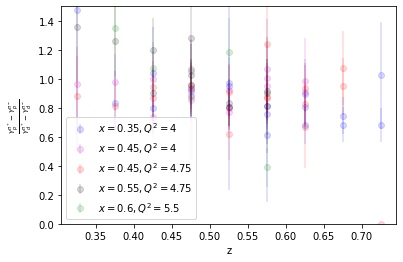

In [23]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',alpha = 0.15,fmt = 'o',label = r'$x = 0.35,Q^2 = 4$')

diff_1.append(diff_ratio.array)
diff_err_1.append(err_diff.array)



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',alpha = 0.15,fmt = 'o')

diff_1.append(diff_ratio.array)
diff_err_1.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',alpha = 0.15,fmt = 'o')

diff_1.append(diff_ratio.array)
diff_err_1.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'b',alpha = 0.15,fmt = 'o')

diff_1.append(diff_ratio.array)
diff_err_1.append(err_diff.array)


# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',alpha = 0.15,fmt = 'o',label = r'$x = 0.45,Q^2 = 4$')

diff_2.append(diff_ratio.array)
diff_err_2.append(err_diff.array)



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',alpha = 0.15,fmt = 'o')

diff_2.append(diff_ratio.array)
diff_err_2.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',alpha = 0.15,fmt = 'o')

diff_2.append(diff_ratio.array)
diff_err_2.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'm',alpha = 0.15,fmt = 'o')

diff_2.append(diff_ratio.array)
diff_err_2.append(err_diff.array)


# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',alpha = 0.15,fmt = 'o',label = r'$x = 0.45,Q^2 = 4.75$')

diff_3.append(diff_ratio.array)
diff_err_3.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',alpha = 0.15,fmt = 'o')

diff_3.append(diff_ratio.array)
diff_err_3.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',alpha = 0.15,fmt = 'o')

diff_3.append(diff_ratio.array)
diff_err_3.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'r',alpha = 0.15,fmt = 'o')
diff_3.append(diff_ratio.array)
diff_err_3.append(err_diff.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',alpha = 0.15,fmt = 'o',label = r'$x = 0.55,Q^2 = 4.75$')

diff_4.append(diff_ratio.array)
diff_err_4.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',alpha = 0.15,fmt = 'o')

diff_4.append(diff_ratio.array)
diff_err_4.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',alpha = 0.15,fmt = 'o')

diff_4.append(diff_ratio.array)
diff_err_4.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'k',alpha = 0.15,fmt = 'o')

diff_4.append(diff_ratio.array)
diff_err_4.append(err_diff.array)

# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'g',alpha = 0.15,fmt = 'o',label = r'$x = 0.6,Q^2 = 5.5$')

diff_5.append(diff_ratio.array)
diff_err_5.append(err_diff.array)

y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'g',alpha = 0.15,fmt = 'o')

diff_5.append(diff_ratio.array)
diff_err_5.append(err_diff.array)


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_exc']
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_exc']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2_diff = y_pos_H2-y_neg_H2
y_D2_diff = y_pos_D2-y_neg_D2
diff_ratio = y_H2_diff/y_D2_diff
error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)
err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_H2 = np.sqrt(err_neg_H2**2+err_pos_H2**2)
err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_diff = diff_ratio*np.sqrt(err_diff_H2**2/y_H2_diff**2+err_diff_D2**2/y_D2_diff**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,diff_ratio,err_diff,color = 'g',alpha = 0.15,fmt = 'o')

diff_5.append(diff_ratio.array)
diff_err_5.append(err_diff.array)


plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2runs/diff_ratio_notmerged.pdf")


In [24]:
print(diff_1)
#print(diff_2)

[[], <PandasArray>
[               nan,                nan,                nan,
                nan,                nan,                nan,
 1.4758455271656772, 0.8350719642811159, 0.7954722560363114,
  0.919271783879383,  0.970277456439482,                nan,
                nan,                nan,                nan,
                nan,                nan,                nan,
                nan,                nan]
Length: 20, dtype: float64, <PandasArray>
[               nan,                nan,                nan,
                nan,                nan,                nan,
                nan,                nan,  1.037992273838822,
 0.9376929580631466,  0.948114984531428, 0.8124410930052801,
 0.8977386237503819,                nan,                nan,
                nan,                nan,                nan,
                nan,                nan]
Length: 20, dtype: float64, <PandasArray>
[               nan,                nan,                nan,
                nan,  

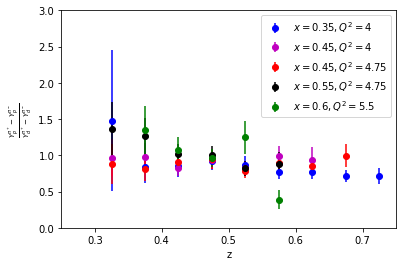

In [25]:
diff_1_average = []
diff_err_1_average = []
for i_i in range(len(diff_1[1])):
    diff_1_each = []
    diff_1_err_each = []
    for i_z in range(1,len(diff_1)):
        diff_1_each.append(diff_1[i_z][i_i])
        diff_1_err_each.append(diff_err_1[i_z][i_i])
    diff_i = Get_weighted_average(diff_1_each,diff_1_err_each)
    diff_err_i = Get_weighted_sigma(diff_1_each,diff_1_err_each) 
    diff_1_average.append(diff_i)
    diff_err_1_average.append(diff_err_i)

plt.errorbar(z_axis.array,diff_1_average,diff_err_1_average,color = 'b',fmt= 'o',label = r'$x = 0.35,Q^2 = 4$')
plt.legend()
plt.ylim(0.1,1.5)

diff_2_average = []
diff_err_2_average = []
for i_i in range(len(diff_2[1])):
    diff_2_each = []
    diff_2_err_each = []
    for i_z in range(1,len(diff_2)):
        diff_2_each.append(diff_2[i_z][i_i])
        diff_2_err_each.append(diff_err_2[i_z][i_i])
    diff_i = Get_weighted_average(diff_2_each,diff_2_err_each)
    diff_err_i = Get_weighted_sigma(diff_2_each,diff_2_err_each) 
    diff_2_average.append(diff_i)
    diff_err_2_average.append(diff_err_i)

plt.errorbar(z_axis.array,diff_2_average,diff_err_2_average,color = 'm',fmt= 'o',label = r'$x = 0.45,Q^2 = 4$')
plt.legend()
plt.ylim(0.1,1.5)

diff_3_average = []
diff_err_3_average = []
for i_i in range(len(diff_3[1])):
    diff_3_each = []
    diff_3_err_each = []
    for i_z in range(1,len(diff_3)):
        diff_3_each.append(diff_3[i_z][i_i])
        diff_3_err_each.append(diff_err_3[i_z][i_i])
    diff_i = Get_weighted_average(diff_3_each,diff_3_err_each)
    diff_err_i = Get_weighted_sigma(diff_3_each,diff_3_err_each) 
    diff_3_average.append(diff_i)
    diff_err_3_average.append(diff_err_i)

plt.errorbar(z_axis.array,diff_3_average,diff_err_3_average,color = 'r',fmt= 'o',label = r'$x = 0.45,Q^2 = 4.75$')
plt.legend()
plt.ylim(0.1,1.5)

diff_4_average = []
diff_err_4_average = []
for i_i in range(len(diff_4[1])):
    diff_4_each = []
    diff_4_err_each = []
    for i_z in range(1,len(diff_4)):
        diff_4_each.append(diff_4[i_z][i_i])
        diff_4_err_each.append(diff_err_4[i_z][i_i])
    diff_i = Get_weighted_average(diff_4_each,diff_4_err_each)
    diff_err_i = Get_weighted_sigma(diff_4_each,diff_4_err_each) 
    diff_4_average.append(diff_i)
    diff_err_4_average.append(diff_err_i)

plt.errorbar(z_axis.array,diff_4_average,diff_err_4_average,color = 'k',fmt= 'o',label = r'$x = 0.55,Q^2 = 4.75$')
plt.legend()
plt.ylim(0.1,1.5)

diff_5_average = []
diff_err_5_average = []
for i_i in range(len(diff_5[1])):
    diff_5_each = []
    diff_5_err_each = []
    for i_z in range(1,len(diff_5)):
        diff_5_each.append(diff_5[i_z][i_i])
        diff_5_err_each.append(diff_err_5[i_z][i_i])
    diff_i = Get_weighted_average(diff_5_each,diff_5_err_each)
    diff_err_i = Get_weighted_sigma(diff_5_each,diff_5_err_each) 
    diff_5_average.append(diff_i)
    diff_err_5_average.append(diff_err_i)

plt.errorbar(z_axis.array,diff_5_average,diff_err_5_average,color = 'g',fmt= 'o',label = r'$x = 0.6,Q^2 = 5.5$')
plt.legend()
plt.ylim(0,3)
plt.xlim(0.25,0.75)
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_p^{\pi^+}-Y_p^{\pi^-}}{Y_d^{\pi^+}-Y_d^{\pi^-}}$')
plt.savefig("results/H2runs/diff_ratio.pdf")
